# Algorithms from Scratch: Decision Tree
## Detailing and Building a Decision Tree model from Scratch

Those of you familiar with my earlier writings would recall that I once wrote an overview of the Random Forest algorithm. A solid foundation on Decision trees is a prerequisite to understanding the inner workings of Random Forest; The Random forest builds multiple Decision tree's and outputs the average over the predictions of each tree for regression problems, and in classification problems it outputs the relative majority of the predictions from each tree.

To build on the above story, I will be focusing much more on the Decision tree learning algorithm as it is a fundamental algorithm in the Machine Learning space. Many models base their structure on the Decision tree model such as the Random Forest and Gradient Boosted tree's. Additionally, I will be doing a Python implementation of this algorithm from scratch to further expand our intuition on what is happening within our algorithm.

Defining terms: 
* Parametric Models - Used to make inferences about population parameters, however these inferences are not valid if all assumptions are not met. 
* Non-Parametric Models - Do not assume that the data or population have any characteristic structure.

## Decision Tree

Popular due to its intelligibility and simplicity, the Decision tree is one of the easiest algorithms to visualize and interpret which is handy when presenting results to a non-technical audience, as is often requi`red in industry. If we simply consider a tree in a flowchart-like state, from root to leaves where the path to a leaf from the root defines decision rules on the features, then we already have a good level of intuition required to understand Decision tree learning.
Unlike the first two algorithms we covered in the Algorithms from Scratch series (Linear Regression and Logistic Regression), the Decision tree algorithm is a non-parametric algorithm meaning that it does not make an assumption about the data or population. This does have an affect on our model since we are introducing variance into the model during training, making the Decision tree much more prone to overfitting.

In the field of Machine Learning there are two main Decision tree models. The one we use depends on the type of target variable we are attempting to predict: 

Classification tree: A tree model employed to predict a target variable that takes a discrete value. Thereby, the leaf node represents a class and the branches represent conjunctions of the features that lead to those class labels.
Regression tree: A tree model employed to predict a target variable that takes a continuous value. Contrary to the classification tree, in the Regression tree, each leaf node contains a continuous value (i.e. a house price); The branches represent conjunctions of the features that lead to each continuous variable.
Note: An umbrella term to refer to both procedures is Classification and Regression Tree (CART), first introduced by Breiman et al. in 1984. 

In Figure 1 we can see the structure that is followed by CART algorithms. Though this structure is set for both trees, there are some subtle differences between classification and regression trees such as the output from each tree - the classification tree returns mode class of the leaf node and the regression tree returns the mean.

Another significant difference between the two algorithms is the criterion that we try to minimize when partitioning the feature space. Generally, we want to select the feature, j, and split-point, s, that best splits the feature space into 2 regions, but how this is done in a regression tree and classification tree differs as is shown in Figure 2.

## Chunking the Algorithm 

Note: We will be building a Decision tree classifier with gini impurity as the criterion for the split. 

1. Consider all possible splits of feature j and split point s
2. Having found the best split, partition the data into 2 resulting regions
3. Repeat 1 and 2 until stopping criterion is reached

This demonstrates a phenomena known as recursion in computer science - A method of solving a problem where the solution depends on solutions to smaller instances of the same problem (Source: Wikipedia), and Binary splitting hence in some illustrations step 1–2 is referred to as recursive binary splitting.

## Implementation

For this implementation we will be leveraging the following frameworks: 
* NumPy (linear algebra and data manipulation)
* Pandas (data manipulation)
* Sci-kit Learn (machine learning)
* Graphviz (graph visualization software) 

In [157]:
import numpy as np 
import pandas as pd 
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None  

The dataset we will use is the iris dataset from scikit learn.

In [158]:
# loading the data set
dataset = load_iris(as_frame=True)
df= pd.DataFrame(data= dataset.data)

# adding the target and target names to dataframe
target_zip= dict(zip(set(dataset.target), dataset.target_names))
df["target"] = dataset.target
df["target_names"] = df["target"].map(target_zip)

print(df.shape)
df.head()

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [159]:
# Seperating to X and Y 
X = df.iloc[:, :4]
y = df.iloc[:, -1]

# splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=24) 

In [160]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

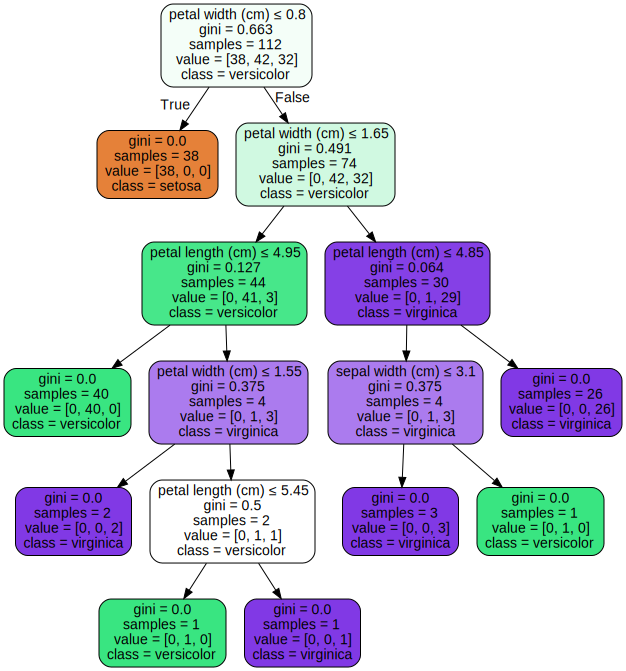

In [161]:
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=dataset.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [162]:
sklearn_y_preds = dt.predict(X_test)
print(f"Sklearn Implementation:\nACCURACY: {accuracy_score(y_test, sklearn_y_preds)}")

Sklearn Implementation:
ACCURACY: 0.9736842105263158


# My Implementation

We are going to need to split our data into true and false index in response to the decision rule at a specific branch. If the condition of the decision rule is met, we say that branch is true (which we will denote as the `left`) and false (denoted as `right`).  

In [163]:
def partition(data, column, value): 
    """
    Partition the data into left (indicating True) and right (inidcating false).
    
    Inputs
    data: The data to partition 
    
    Outputs
    left: index of values that meet condition
    right: index of values that fail to meet the condition
    """
    left = data[data[column] <= value].index
    right = data[data[column] > value].index

    return left, right

To check if our function works correctly, we will perform a split on all of the data and pass it the best column and value manually to see if our data is seperated with respect to the graph above. 

In [164]:
# performing a split on the root node
left_idx, right_idx = partition(X_train, "petal length (cm)", 2.45)

print("[petal length (cm) <= 2.45]")

# print results --> left_idx = 38 setosa | right index = 42 versicolor, 32 virginica 
print(f"left_idx: {dict(zip(np.unique(y_train.loc[left_idx], return_counts=True)[0], np.unique(y_train.loc[left_idx], return_counts=True)[1]))}\n\
right_idx: {dict(zip(np.unique(y_train.loc[right_idx], return_counts=True)[0], np.unique(y_train.loc[right_idx], return_counts=True)[1]))}")

[petal length (cm) <= 2.45]
left_idx: {'setosa': 38}
right_idx: {'versicolor': 42, 'virginica': 32}


Perfect!

Next, we need a criterion that we want to minimize. In this implementation we will be minimizing the gini impurity using a function called `gini_impurity`. Without getting to technical gini impurity simply measures how mixed our data is at a node; To help you conceptualize this think of gold. When gold is impure it referes to the mixture of other substances within it, however when it is pure we can say there are 0 impurities (this isn't exactly true as refined gold up to 99.99% pure so technically there are still some impurities). 

The ideal is to nodes that are pure meaning that the target labels are seperated into seperate nodes. - To go into the technical details of gini impurity see [here](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

In [165]:
def gini_impurity(label, label_idx):
    """
    A measure of how often a randomly chosen element from the set would
    be incorrectly labelled if it was randomly labelled according to the 
    distribution of labels in the subset (Soure: Wikipedia)
    
    Inputs
    label: The class label available at current node
    
    Outputs
    impurity: The gini impurity of the node 
    """
    # the unique labels and counts in the data
    unique_label, unique_label_count = np.unique(label.loc[label_idx], return_counts=True)

    impurity = 1.0
    for i in range(len(unique_label)):
        p_i = unique_label_count[i] / sum(unique_label_count)
        impurity -= p_i ** 2 
    return impurity 

If you scroll back up to *Figure # - DECISION TREE GRAPH* you will see that the impurity at the root node is 0.663. Therefore, to determine whether our `gini_impurity` function is working correctly, we should see this number on output

In [166]:
# Gini impurity of the first node
impurity = gini_impurity(y_train, y_train.index)
impurity`

SyntaxError: invalid syntax (<ipython-input-166-819e5389a95b>, line 3)

Great! 

To split at a feature (and value) we need to a way of quantifying what would result in the best outcome if we were to split at that point. Information gain is a useful way to quantify what feature and feature value to split on at each node. For each node of the tree, the information value "represents the expected amount of information that would be needed to specify whether a new instance should be classified yes or no, given that the example reached that node". (Source: Wikipedia)

In [167]:
def information_gain(label, left_idx, right_idx, impurity): 
    """
    For each node of the tree, the information gain "represents the
    expected amount of information that would be needed to specify whether
    a new instance should be classified yes or no, given that the example
    reached that node. (Source: Wikipedia)
    
    Inputs
    left: The values that met the conditions of the current node
    right: The values that failed to meet the conditions of the current noode
    gini_impurity: the uncertainty at the current node
    
    Outputs
    info_gain: The information gain at the node
    """
    
    p = float(len(left_idx)) / (len(left_idx) + len(right_idx))
    info_gain = impurity - p * gini_impurity(label, left_idx) - (1 - p) * gini_impurity(label, right_idx)
    return info_gain


The best first split is the one that provides the most information gain. This process is repeated for each impure node until the tree is complete. (Source: Wikipedia) 

Based on the above statement, we can now see why petal length (cm) with the value 2.45 was selected as the first split. 

In [168]:
# testing info gain of the first split at root node
info_gain = information_gain(y_train, left_idx, right_idx, impurity)
info_gain

0.33830322669608387

In [169]:
# testing a random feature and value to see the information gain
left_idx, right_idx = partition(X_train, "petal width (cm)", 1.65)

impurity = gini_impurity(y_train, y_train.index)

info_gain = information_gain(y_train, left_idx, right_idx, impurity)
info_gain

0.25446843371494937

The above helper functions are now going to be brought into play. We had to manually select the feature and value before right? The next function will now automatically search the feature space and find the feature and feature value the best splits the data. 

In [170]:
def find_best_split(df, label, idx):
    """
    Splits the data on the best column and value 
    
    Input
    df: the training data
    label: the target label 
    idx: the index of the data
    
    Output: 
    best_gain: the max information gain
    best_col: the column that produced best information gain
    best_val: the value of the column that produced best information gain
    
    """
    
    best_gain = 0 
    best_col = None
    best_value = None
    
    df = df.loc[idx] # converting training data to pandas dataframe
    label_idx = label.loc[idx].index # getting the index of the labels

    impurity = gini_impurity(label, label_idx) # determining the impurity at the current node
    
    # go through the columns and store the unique values in each column (no point testing on the same value twice)
    for col in df.columns: 
        unique_values = set(df[col])
        # loop thorugh each value and partition the data into true (left_index) and false (right_index)
        for value in unique_values: 

            left_idx, right_idx = partition(df, col, value)
            # ignore if the index is empty (meaning there was no features that met the decision rule)
            if len(left_idx) == 0 or len(right_idx) == 0: 
                continue 
            # determine the info gain at the node
            info_gain = information_gain(label, left_idx, right_idx, impurity)
            # if the info gain is higher then our current best gain then that becomes the best gain
            if info_gain > best_gain:
                best_gain, best_col, best_value = info_gain, col, value
                
    return best_gain, best_col, best_value


In [171]:
find_best_split(X_train, y_train, y_train.index)

(0.33830322669608387, 'petal length (cm)', 1.9)

In [172]:
# helper function to count values
def count(label, idx):
    """
    Function that couunts the unique values
    
    Input
    label: target labels
    idx: index of rows 
    
    Output
    dict_label_count: Dictionary of label and counts
    
    """
    unique_label, unique_label_counts = np.unique(label.loc[idx], return_counts=True)
    dict_label_count = dict(zip(unique_label, unique_label_counts))
    return dict_label_count

In [173]:
# check counts at first node to check it aligns with scitkit learn
count(y_train, y_train.index)

{'setosa': 38, 'versicolor': 42, 'virginica': 32}

In [174]:
# https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb
class Leaf:
    """
    A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, label, idx):
        self.predictions = count(label, idx)

In [175]:
# https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb
class Decision_Node:
    """
    A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 column,
                 value,
                 true_branch,
                 false_branch):
        self.column = column
        self.value = value
        self.true_branch = true_branch
        self.false_branch = false_branch

Great, we have all the components we need for our algorithm to work. However, the above functions on only perform one split on our training data (the stump/root). For the algorithm to work we will need the splits to happen recursively until we meet a stopping criterion - in this case it's until each leaf node is pure. 

In [176]:
def build_tree(df, label, idx): 
    """
    Recursively Builds the tree until is leaf is pure. 
    
    Input 
    df: the training data
    label: the target labels
    idx: the indexes 
    
    Output
    best_col: the best column 
    best_value: the value of the column that minimizes impurity 
    true_branch: the true branch 
    false_branch: the false branch 
    """
    best_gain, best_col, best_value = find_best_split(df, label, idx)
    
    if best_gain == 0: 
        return Leaf(label, label.loc[idx].index)
    
    left_idx, right_idx = partition(df.loc[idx], best_col, best_value)
    
    true_branch = build_tree(df, label, left_idx)
    
    false_branch = build_tree(df, label, right_idx)
    
    return Decision_Node(best_col, best_value, true_branch, false_branch)

In [177]:
# https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb
def print_tree(node, spacing=""):
    """
    World's most elegant tree printing function.
    
    Input
    node: the tree node
    spacing: used to space creating tree like structure
    """

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the col and value at this node
    print(spacing + f"[{node.column} <= {node.value}]")
    

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [178]:
my_tree = build_tree(X_train, y_train, X_train.index)

In [179]:
print_tree(my_tree)

[petal length (cm) <= 1.9]
--> True:
  Predict {'setosa': 38}
--> False:
  [petal width (cm) <= 1.6]
  --> True:
    [petal length (cm) <= 4.9]
    --> True:
      Predict {'versicolor': 40}
    --> False:
      [sepal length (cm) <= 6.0]
      --> True:
        [sepal width (cm) <= 2.2]
        --> True:
          Predict {'virginica': 1}
        --> False:
          Predict {'versicolor': 1}
      --> False:
        Predict {'virginica': 2}
  --> False:
    [petal length (cm) <= 4.8]
    --> True:
      [sepal width (cm) <= 3.0]
      --> True:
        Predict {'virginica': 3}
      --> False:
        Predict {'versicolor': 1}
    --> False:
      Predict {'virginica': 26}


Super! Now you've seen how to implement a Decision tree from scratch and we have used it to train our data.

In [197]:
def predict(test_data, tree):
    
    """
    Classify unseen examples
    
    Inputs
    test_data: Unseen observation
    tree: tree that has been trained on training data
    
    Output
    The prediction of the observation.
    """
    
    # Check if we are at a leaf node
    if isinstance(tree, Leaf): 
        return max(tree.predictions)
    
    # the current feature_name and value 
    feature_name, feature_value = tree.column, tree.value
    
    # pass the observation through the nodes recursively
    if test_data[feature_name] <= feature_value: 
        return predict(test_data, tree.true_branch)
    
    else: 
        return predict(test_data, tree.false_branch)
        
        

In [198]:
# taking one instance to test function 
example, example_target = X_test.iloc[6], y_test.iloc[6]
example, example_target

(sepal length (cm)       5.3
 sepal width (cm)        3.7
 petal length (cm)       1.5
 petal width (cm)        0.2
 predictions          setosa
 Name: 48, dtype: object,
 'setosa')

In [199]:
# if working correctly should output setosa
predict(example, my_tree)

'setosa'

In [200]:
# create a new col of predictions
X_test["predictions"] = X_test.apply(predict, axis=1, args=(my_tree,))

In [202]:
sklearn_y_preds == X_test["predictions"]

107    True
114    True
57     True
59     True
105    True
11     True
48     True
72     True
29     True
148    True
30     True
19     True
26     True
111    True
144    True
14     True
103    True
31     True
104    True
120    True
112    True
140    True
135    True
51     True
136    True
1      True
108    True
137    True
49     True
109    True
78     True
17     True
77     True
92     True
133    True
113    True
9      True
84     True
Name: predictions, dtype: bool

In [201]:
# sklearn accuracy vs my implementation accuracy
print(f"Sklearn Implementation:\nACCURACY: {accuracy_score(y_test, sklearn_y_preds)}\n\n\
My Implementation:\nACCURACY: {accuracy_score(y_test, X_test['predictions'])}")

Sklearn Implementation:
ACCURACY: 0.9736842105263158

My Implementation:
ACCURACY: 0.9736842105263158


### Pros
* Simple and easy to interpret 
* Able to handle both numerical and categorical data
* Requires little data preparation 
* Performs well with large datasets
* Built in feature selection

### Cons 
* Instability of trees (Changing something in the data can change everything) 
* Lack of smoothness (Particular issue for regression problems) 
* Prone to overfitting

## Wrap Up 
Establishing a good foundation of Decision trees will go a long way in understanding many other important Machine Learning algorithms. It is a very powerful algorithm that is often used as an ensemble model to win various Data Science competitions.

Thank you for reading to the end of the article! If you'd like to keep in contact with me, I am most accessible on LinkedIn.
###INSERT LINKED IN 